# P001 - Real Estate Insights

# 0.0. - IMPORTS

In [1]:
import pandas as pd
import numpy as np 
import statistics as st
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()
jupyter_settings()

## 0.2. Loading Data

In [3]:
# load data
df_raw = pd.read_csv("../datasets/kc_house_data.csv")
df_raw.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12493,1921069101,20150508T000000,399000.00,3,1.75,2170,73616,1.00,0,0,3,7,2170,0,2008,0,98092,47.29,-122.09,1710,297514
13838,8732130730,20141120T000000,280000.00,3,1.75,1770,8240,1.00,0,0,4,7,1240,530,1978,0,98023,47.31,-122.38,2060,8250
3838,534000112,20150203T000000,348000.00,2,2.50,1270,1242,3.00,0,0,3,7,1270,0,2008,0,98117,47.70,-122.36,1280,1199
16278,796000235,20150401T000000,209950.00,2,1.00,1050,6250,1.00,0,0,4,6,840,210,1943,0,98168,47.50,-122.33,1310,12500
3423,6411600026,20141003T000000,475500.00,3,1.00,1500,9416,1.00,0,0,4,8,1500,0,1952,0,98133,47.71,-122.33,1440,7200


# 1.0 DATA DESCRIPTION

In [4]:
# copy data
df1 = df_raw.copy()

## 1.1. Columns

In [5]:
# column name
print(df1.columns)
cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


## 1.2. Data Dimensions

In [6]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 21613
Number of Cols: 21


## 1.3 Data Types

In [7]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [8]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 1.4. Check NA 

In [9]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.5. Fillout NA

In [10]:
# No NA to fill

## 1.6. Drop Duplicates

In [11]:
print('number of rows: ' + str(df1.shape[0]) )
print('uniques ids: ' + str(df1['id'].unique().shape[0]))
print('number of duplicated ids: ' + str(df1.shape[0] - df1['id'].unique().shape[0]), )

number of rows: 21613
uniques ids: 21436
number of duplicated ids: 177


In [12]:
# sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

# deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print('new shape:', df1.shape)

new shape: (21436, 21)


## 1.7. Descriptive Statistics 

In [13]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Attributes

In [14]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - min, max, std, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(lambda x: x.quantile(0.25))).T
d2 = pd.DataFrame(num_attributes.apply(lambda x: x.quantile(0.75))).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))).T
d4 = pd.DataFrame(num_attributes.apply( min)).T
d5 = pd.DataFrame(num_attributes.apply( max)).T
d6 = pd.DataFrame(num_attributes.apply( np.std)).T
d7 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d8 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d9 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T


# concat statistics columns:
ds_num = pd.concat([ct1, ct2, d6, d4, d1, d2, d5, d3, d7, d8, d9]).T.reset_index()
ds_num.columns = ['atributes', 'mean', 'median', 'std', 'min', 'Q1', 'Q3', 'max', 'interquantile_range', 'range', 'skew', 'kurtosis']
ds_num


,atributes,mean,median,std,min,Q1,Q3,max,interquantile_range,range,skew,kurtosis
0,id,4580765328.18,3904921185.00,2876522535.73,1000102.00,2123700078.75,7308675062.50,9900000190.00,5184974983.75,9899000088.00,0.24,-1.26
1,price,541649.96,450000.00,367306.36,75000.00,324866.00,645000.00,7700000.00,320134.00,7625000.00,4.04,34.73
2,bedrooms,3.37,3.00,0.93,0.00,3.00,4.00,33.00,1.00,33.00,1.99,49.64
3,bathrooms,2.12,2.25,0.77,0.00,1.75,2.50,8.00,0.75,8.00,0.51,1.29
4,sqft_living,2082.70,1920.00,919.13,290.00,1430.00,2550.00,13540.00,1120.00,13250.00,1.47,5.25
5,sqft_lot,15135.64,7614.00,41537.65,520.00,5040.00,10696.25,1651359.00,5656.25,1650839.00,13.04,284.08
6,floors,1.50,1.50,0.54,1.00,1.00,2.00,3.50,1.00,2.50,0.61,-0.49
7,waterfront,0.01,0.00,0.09,0.00,0.00,0.00,1.00,0.00,1.00,11.34,126.55
8,view,0.24,0.00,0.77,0.00,0.00,0.00,4.00,0.00,4.00,3.39,10.83
9,condition,3.41,3.00,0.65,1.00,3.00,4.00,5.00,1.00,4.00,1.04,0.52


### 1.7.2. Categorical Attributes

In [15]:
cat_attributes.shape

# no categorical atributes to analyse

(21436, 0)

## 1.8. Line Filtering

In [16]:
# remove lines whose content is unreliable
print('lines before filtering: ' + str(df1.shape[0]))
df1 = df1[(df1['bedrooms'] <= 10) & (df1['bedrooms'] != 10) & (df1['bathrooms'] >= 1) & (df1['bathrooms'] <= 6)]
print('lines after filtering: ' + str(df1.shape[0]))

lines before filtering: 21436
lines after filtering: 21336


<AxesSubplot:ylabel='Price (millions)'>

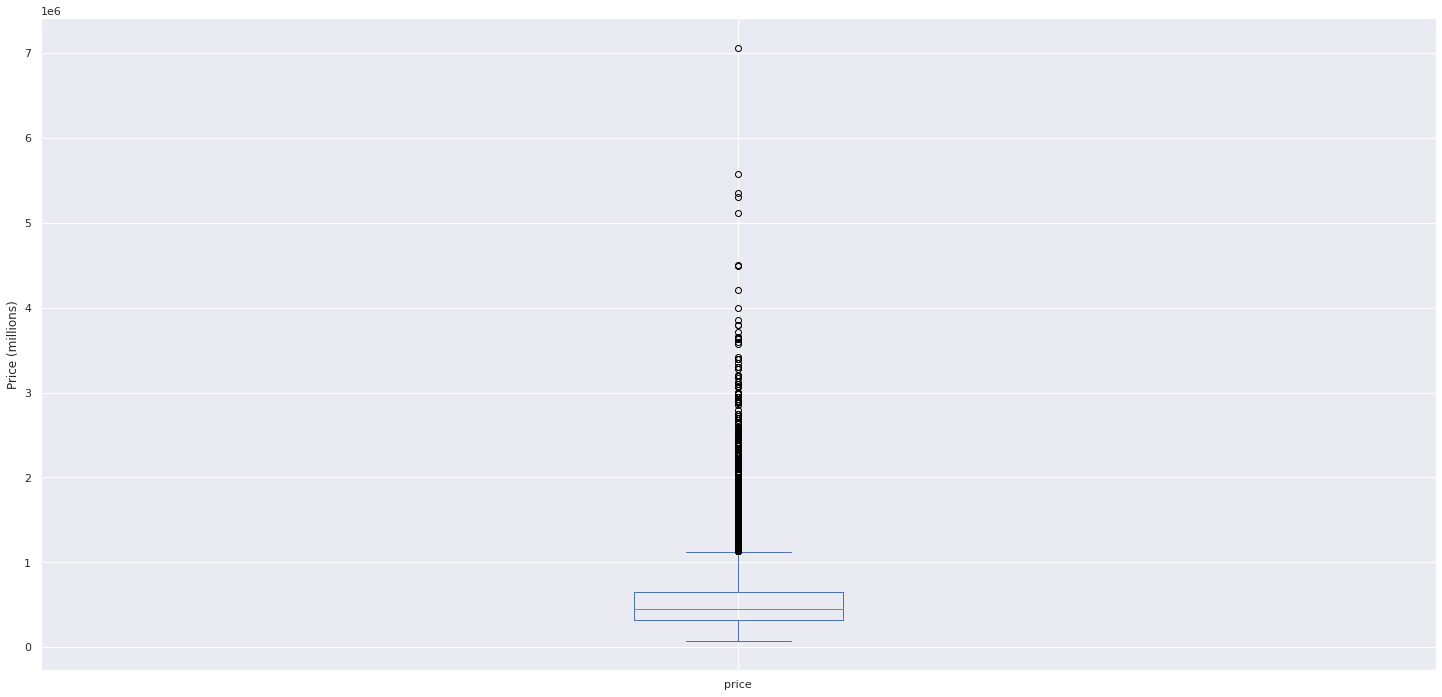

In [21]:
box_price = df1[['price']].plot.box()
box_price.set_ylabel('Price (millions)')
box_price

<AxesSubplot:xlabel='sqft_living'>

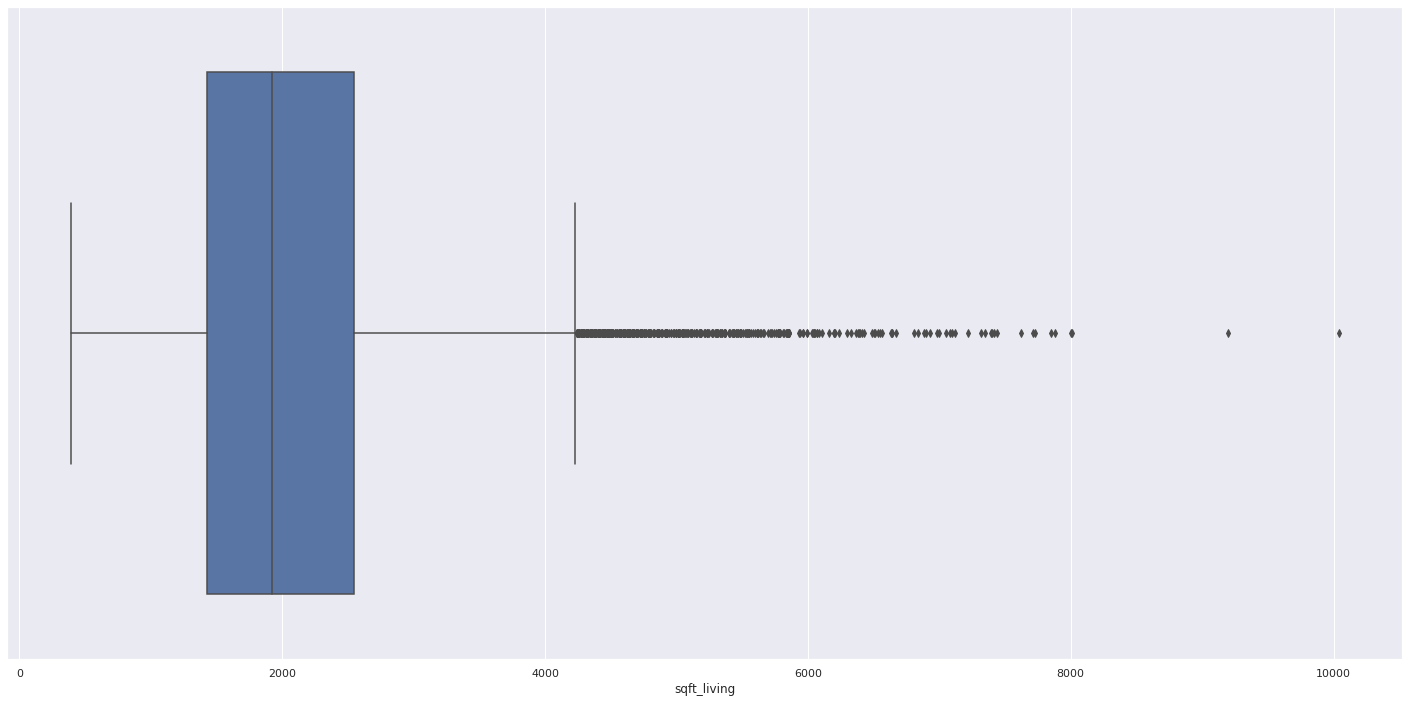

In [26]:
sns.boxplot(df1['sqft_living'])